In [74]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow

In [75]:
from keras.datasets import boston_housing

In [76]:
(train_data,train_targets),(test_data,test_targets)=boston_housing.load_data()

## Attributes of Data

In [77]:
print(len(train_data))
print(len(test_data))
print(train_data.shape)
print(test_data.shape)

404
102
(404, 13)
(102, 13)


### Labels are the mean price values in 1k dollars

In [78]:
print(train_targets)

print(test_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [79]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)

In [80]:
train_data-=mean
train_data/=std

In [81]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

## Lets get started

In [82]:
from keras import models
from keras import layers

def build_model():
    model=models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model


## K-Fold Validation

In [83]:
k=4
num_val_samples=len(train_data)//k
num_epochs=100
all_scores=[]
num_val_samples

101

In [84]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]],axis=0)
    model=build_model()
    model.fit(partial_train_data, partial_train_targets,
        epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [85]:
print(all_scores)
np.mean(all_scores)

[2.0561602351689103, 2.197253930686724, 2.9725135718241775, 2.3887315876413098]


2.40366483133028

## For 500 epochs

In [86]:
k=4
num_val_samples=len(train_data)//k
num_epochs=500
all_mae_histories=[]
num_val_samples

101

In [87]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                        train_targets[(i + 1) * num_val_samples:]],axis=0)
    model=build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [88]:
len(all_mae_histories[0])

500

In [89]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [90]:
average_mae_history

[4.796269461660102,
 3.388238281306654,
 3.061993864503237,
 2.7484520461299633,
 2.80074945062694,
 2.7023014809825634,
 2.6415030106459514,
 2.6315107109523055,
 2.562862494204304,
 2.585591881582052,
 2.4896637484578803,
 2.731956430000834,
 2.5156363024569974,
 2.4003430309862193,
 2.43239428501318,
 2.4223095532691126,
 2.477807870005617,
 2.446751560315047,
 2.3628883833932406,
 2.498688898464241,
 2.3787551622579595,
 2.349093801904433,
 2.324021832777722,
 2.340618425076551,
 2.5041187848194992,
 2.338131050072094,
 2.2949599322706167,
 2.406865115803067,
 2.3154274756365485,
 2.4512428824264227,
 2.3697790662841043,
 2.479339658623875,
 2.3461384360152895,
 2.440986126956373,
 2.43088704288596,
 2.2870150828125455,
 2.37707514337974,
 2.321323040688392,
 2.302972648403432,
 2.3791929701767343,
 2.2830259811760176,
 2.304643901267854,
 2.304004453196384,
 2.296962804133349,
 2.2344562488027138,
 2.468655356086127,
 2.295097910531677,
 2.3400272119163286,
 2.355159490415365,
 2.

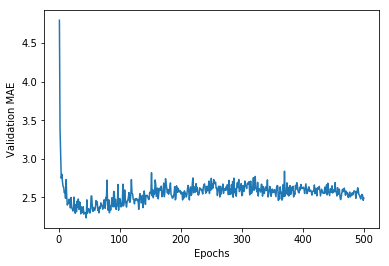

In [91]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

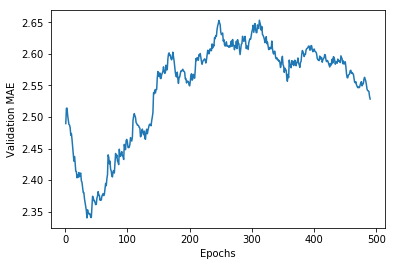

In [92]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [93]:
model=build_model()
history = model.fit(train_data,train_targets,epochs=80,batch_size=16,verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [100]:
history.history.keys()


dict_keys(['loss', 'mean_absolute_error'])

In [101]:
np.mean(history.history['mean_absolute_error'])



2.6528908290190274

In [102]:
history.history['mean_absolute_error']

[20.206836568246974,
 15.107538109958762,
 9.21993908079544,
 5.921781809023111,
 4.648781231134245,
 4.017634719905287,
 3.5856754945056273,
 3.3602515942979565,
 3.1201190641610927,
 3.0099141385295605,
 2.880754820191034,
 2.737633292037662,
 2.6326945465390046,
 2.5580113713103945,
 2.4495862686988152,
 2.401134231302998,
 2.3560211682083585,
 2.31807541611171,
 2.281596568551394,
 2.280038403992606,
 2.2398306756916613,
 2.218971620691885,
 2.2200013953860442,
 2.180817150833583,
 2.1594801633664877,
 2.1796547162650834,
 2.145904524491565,
 2.1162607268531723,
 2.098598477864029,
 2.122082278279975,
 2.0745378720878374,
 2.0600679180409647,
 2.0384520374902406,
 2.0488221314874027,
 2.041057884103001,
 2.037715248542257,
 2.032697849934644,
 2.0167537490920266,
 2.0093761953977074,
 1.9990836086839732,
 1.967960829782014,
 1.994715142958235,
 1.961995799942772,
 1.9351713492138551,
 1.9588929993091244,
 1.947120505984467,
 1.9099845012815873,
 1.9087780371750935,
 1.8743066032334